# Ripser demonstration

This notebook shows the most basic use of the Ripser Python API.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [3]:
data = datasets.make_circles(n_samples=100)[0] + 5 * datasets.make_circles(n_samples=100)[0]

## Default args make it very easy. 

- Generate diagrams for $H_0$ and $H_1$
- Plot both diagrams

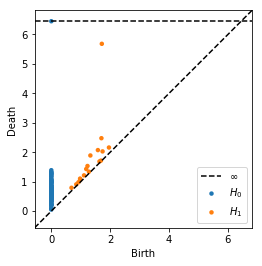

In [4]:
dgms = ripser(data)['dgms']
plot_diagrams(dgms, show=True)

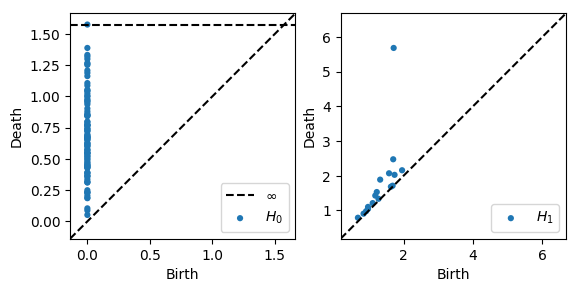

In [5]:
# Plot each diagram by itself
plot_diagrams(dgms, plot_only=[0], ax=plt.subplot(121))
plot_diagrams(dgms, plot_only=[1], ax=plt.subplot(122))

## Homology over any prime basis

We can compute homology over any $p\ge 2$ by supplying the argument `coeff=p`.

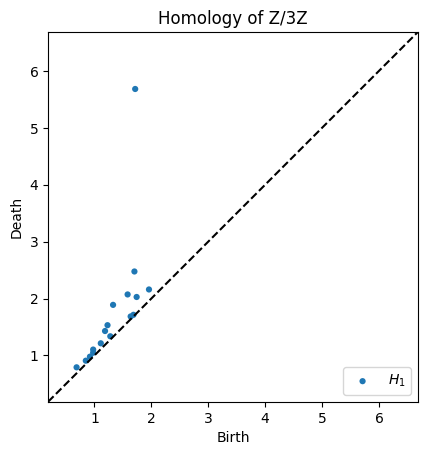

In [6]:
# Homology over Z/3Z
dgms = ripser(data, coeff=3)['dgms']
plot_diagrams(dgms, plot_only=[1], title="Homology of Z/3Z", show=True)

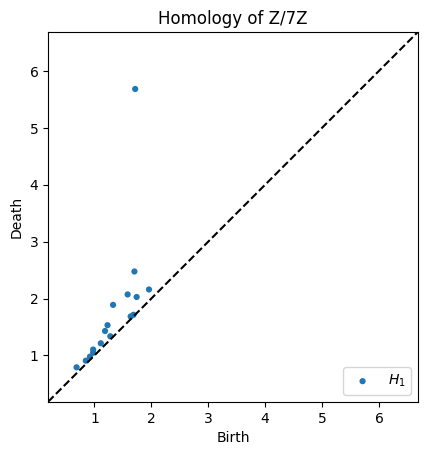

In [7]:
# Homology over Z/7Z
dgms = ripser(data, coeff=3)['dgms']
plot_diagrams(dgms, plot_only=[1], title="Homology of Z/7Z", show=True) # Only plot H_1

## Specify which homology classes to compute

We can compute any order of homology, $H_0, H_1, H_2, \ldots$. By default, we only compute $H_0$ and $H_1$. You can specify a larger by supplying the argument `maxdim=p`. It practice, anything above $H_1$ is very slow.

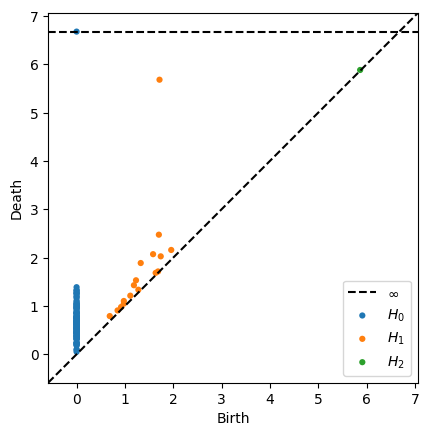

In [8]:
dgms = ripser(data, maxdim=2)['dgms']
plot_diagrams(dgms, show=True)

## Specify maximum radius for Rips filtration

We can restrict the maximum radius of the VR complex by supplying the argument `thresh=r`.  Certain classes will not be born if their birth time is under the threshold, and other classes will have infinite death times if their ordinary death time is above the threshold

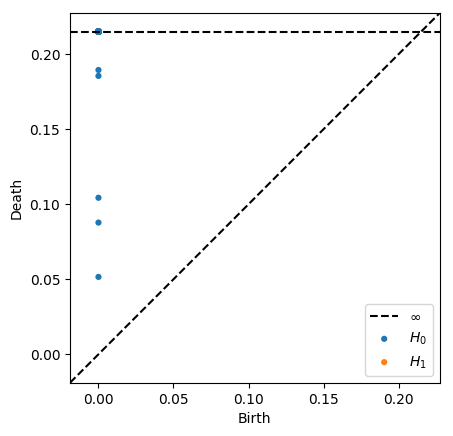

In [9]:
dgms = ripser(data, thresh=0.2)['dgms']
plot_diagrams(dgms, show=True)

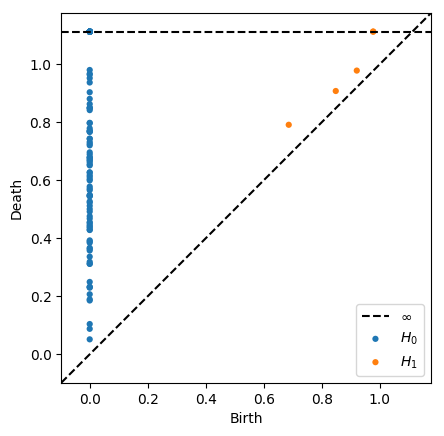

In [10]:
dgms = ripser(data, thresh=1)['dgms']
plot_diagrams(dgms, show=True)

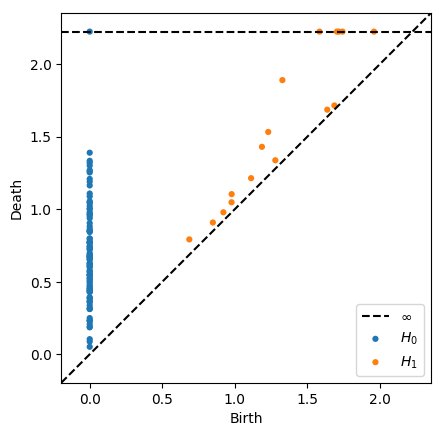

In [11]:
dgms = ripser(data, thresh=2)['dgms']
plot_diagrams(dgms, show=True)

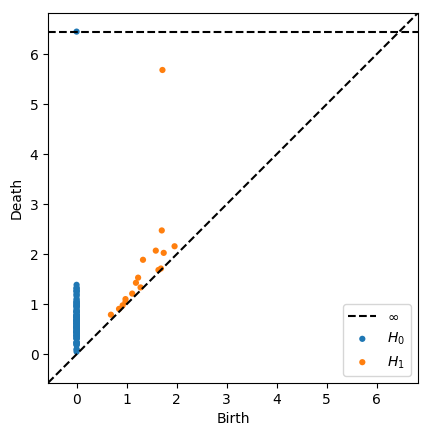

In [12]:
dgms = ripser(data, thresh=999)['dgms']
plot_diagrams(dgms, show=True)

## Plotting Options

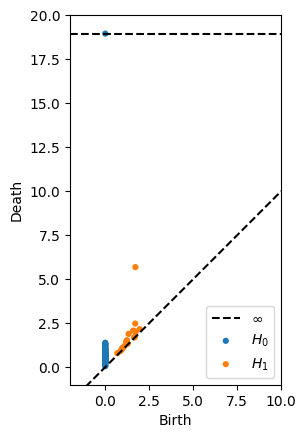

In [13]:
# This looks weird, but it's possible
plot_diagrams(dgms, xy_range=[-2,10,-1,20])

### Colormaps

See all available color maps with 
```
    import matplotlib as mpl
    print(mpl.styles.available)
```

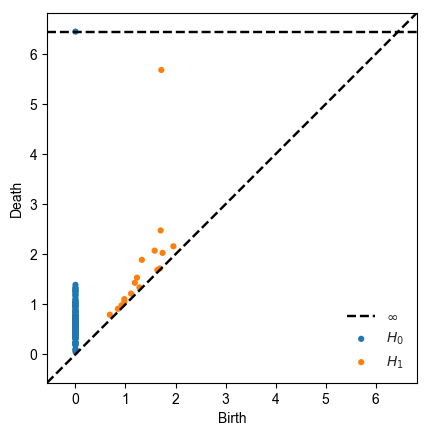

In [14]:
plot_diagrams(dgms, colormap='seaborn')

### Plot lifetime of generators 

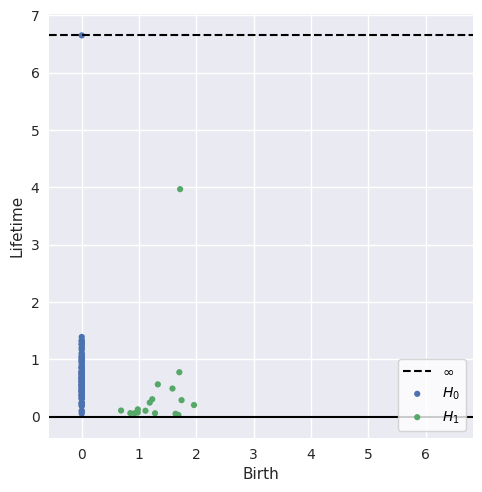

In [15]:
plot_diagrams(dgms, lifetime=True)